Імпортуємо необхідні бібліотеки

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg

In [ ]:
! gdown 1iT15C0qLWh9hIK1CDATzz2U1GzkHVwmO

Downloading...
From: https://drive.google.com/uc?id=1iT15C0qLWh9hIK1CDATzz2U1GzkHVwmO
To: /content/photo_2023-04-10_13-49-52.jpg
100% 58.6k/58.6k [00:00<00:00, 81.0MB/s]


In [ ]:
image_path = "/content/photo_2023-04-10_13-49-52.jpg"
image = Image.open(image_path)

In [ ]:
def rgb_to_gray(image):
    """
    Функція для переведення зображення у ч/б формат
    """
    width, height = image.size
    gray_image = Image.new('L', (width, height))

    for x in range(width):
        for y in range(height):
            r, g, b = image.getpixel((x, y))
            gray = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            gray_image.putpixel((x, y), gray)

    return gray_image

In [ ]:
image = rgb_to_gray(image)

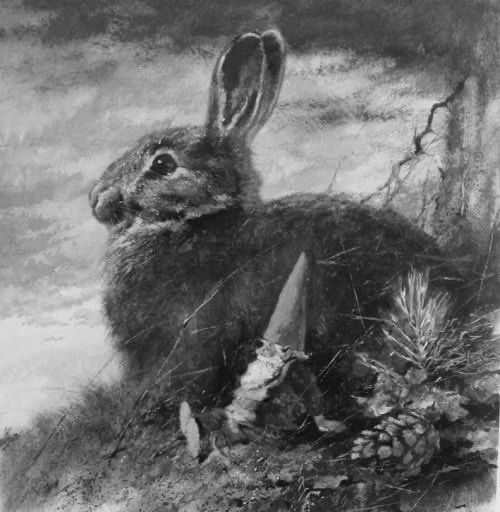

In [ ]:
image

In [ ]:
width, height = image.size
pixels = list(image.getdata())

1. Noise Reduction

In [ ]:
def Gaus_formula(kernel_size, sigma=1.0):
    """
    Функція для отримання матриці ядра
    """
    size = int(kernel_size) // 2
    x, y = np.mgrid[-size:size + 1, -size:size + 1]
    H = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))/(2.0*np.pi*sigma**2)

    return H

In [ ]:
kernel_matrix = Gaus_formula(5)

In [ ]:
def convolve(image, kernel):
    """
    Функція для здійснення згортки
    """
    my_image = np.array(image)
    i_rows, i_cols = my_image.shape
    k_rows, k_cols = kernel.shape
    output = np.zeros(my_image.shape)

    for i in range(i_rows - k_rows + 1):
        for j in range(i_cols - k_cols + 1):
            output[i, j] = (kernel * my_image[i:i+k_rows, j:j+k_cols]).sum()
    
    return output

In [ ]:
blurred_image = convolve(image, kernel_matrix)

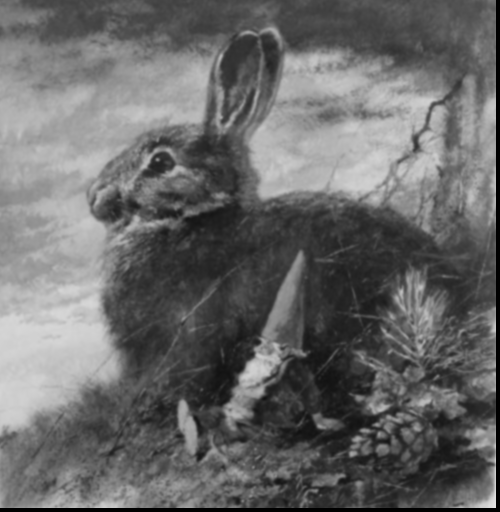

In [ ]:
Image.fromarray(np.array(blurred_image, dtype=np.uint8))

2. Gradient Calculation

In [ ]:
Core_x = np.asarray([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

Core_y = np.asarray([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])

In [ ]:
intensity_gradient_x = convolve(blurred_image, Core_x)
intensity_gradient_y = convolve(blurred_image, Core_y)

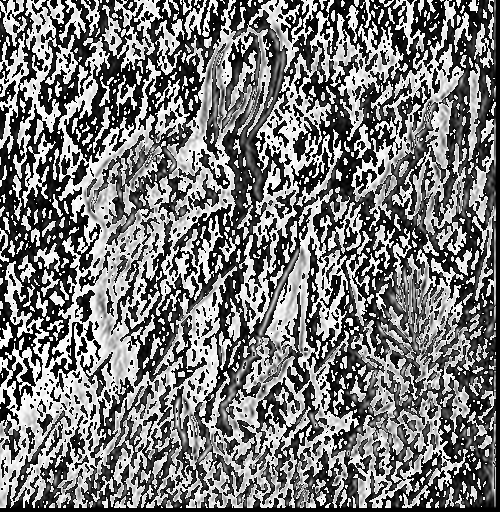

In [ ]:
Image.fromarray(np.array(intensity_gradient_x, dtype=np.uint8))

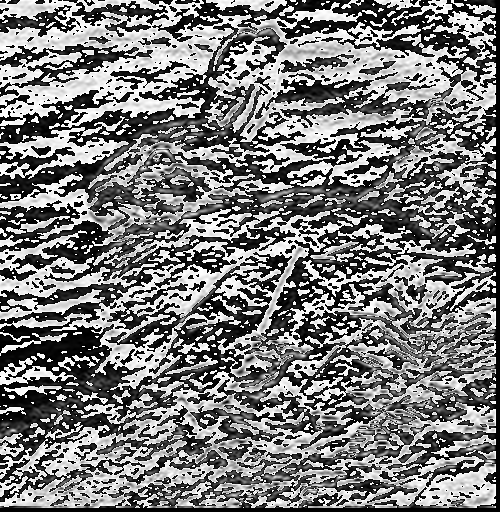

In [ ]:
Image.fromarray(np.array(intensity_gradient_y, dtype=np.uint8))

3. Non-Maximum Suppression

In [ ]:
def magnitude(Core_x, Core_y):
    return np.hypot(Core_x, Core_y)

In [ ]:
magnitude_threshold = magnitude(intensity_gradient_x, intensity_gradient_y)
magnitude_threshold = magnitude_threshold / magnitude_threshold.max() * 255

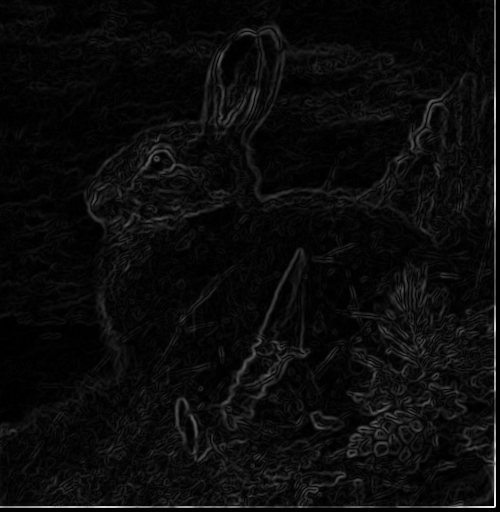

In [ ]:
Image.fromarray(np.array(magnitude_threshold, dtype=np.uint8))

4. Double threshold

In [ ]:
high_bound = magnitude_threshold.max() * 0.09
low_bound = magnitude_threshold.max() * 0.09 * 0.05

high = np.where(magnitude_threshold >= high_bound, 255, 0)
low = np.where(magnitude_threshold < low_bound, 255, 0)

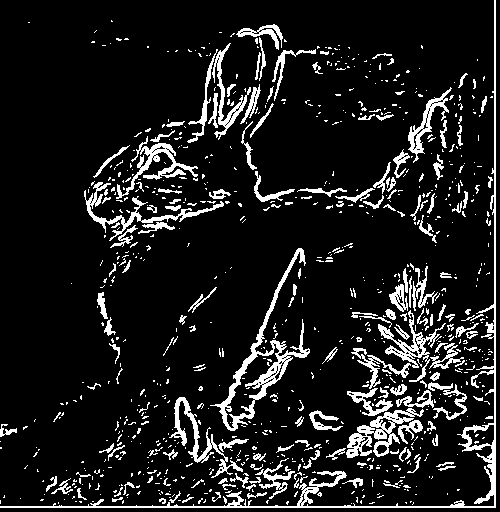

In [ ]:
Image.fromarray(np.array(high, dtype=np.uint8))

5. Hysteresis

In [ ]:
def hysteresis(image, weak=200):
    image_row, image_col = image.shape

    final_image = np.zeros((image_row, image_col))

    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            if image[row, col] >= weak:
                if (image[row - 1:row + 2, col - 1:col + 2] == 255).any():
                    final_image[row, col] = 255

    return final_image

In [ ]:
final_image = hysteresis(high)

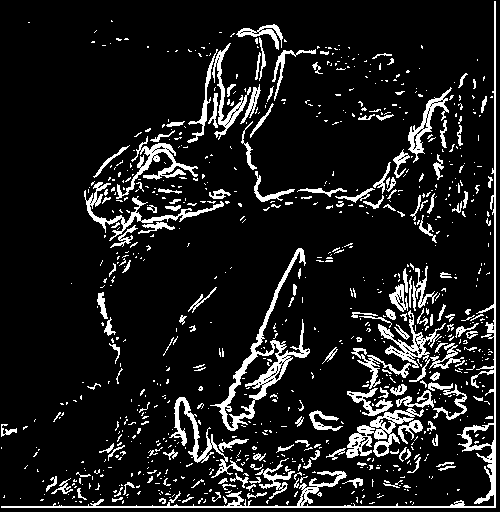

In [ ]:
Image.fromarray(np.array(final_image, dtype=np.uint8))